In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [8]:
cd ..

/Users/venkatakrishnamohansunkara/Desktop/DM


In [22]:
df = pd.read_csv('GDELT_2017/unrest_gdelt_2017_sentiment.csv')

In [23]:
df.head()

,Unnamed: 0,Unnamed: 0.1,content,day,event_code,lat,long,month,place,time,title,url,year,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_compound,sentiment_textblob
0,0,0,Bringing to an end the musical chairs game for...,1.0,40.0,28.6000,77.2000,1.0,IN,"Updated: January 1, 2017 11:34:40 am","In Arunachal, CM Pema Khandu wins musical chai...",http://indianexpress.com/article/india/in-arun...,2017.0,0.137,0.038,0.825,0.9965,0.082525
1,1,1,MUMBAI: Request for a seat share landed a yout...,1.0,180.0,19.6833,72.7500,1.0,IN,NaN,Mumbaikar brutally assaulted in Dahanu local o...,http://timesofindia.indiatimes.com/city/mumbai...,2017.0,0.036,0.176,0.788,-0.9881,-0.255785
2,2,2,The CIA staff of the Mohali police on Saturday...,1.0,173.0,24.1492,78.9817,1.0,IN,"Published: January 1, 2017 5:00:13 am",Two held with 2 kg heroin worth Rs 5 crore in ...,http://indianexpress.com/article/cities/chandi...,2017.0,0.023,0.180,0.797,-0.9790,0.105556
3,3,3,THE PREDICTION of snowfall on New Years Eve dr...,1.0,120.0,31.9167,77.2500,1.0,IN,"Published: January 1, 2017 5:02:08 am","Tourists descend in hope of snow, Shimla feels...",http://indianexpress.com/article/cities/chandi...,2017.0,0.052,0.035,0.913,0.8085,0.135787
4,4,4,This was the year when old certainties crumble...,1.0,42.0,18.9750,72.8258,1.0,IN,"Updated: January 1, 2017 12:46:58 pm",The Future of the Future: EYE 2017 special issue,http://indianexpress.com/article/lifestyle/lif...,2017.0,0.086,0.051,0.863,0.9431,0.096080


In [24]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [8]:
tblob_pos = 0
tblob_neg = 0
vader_pos = 0
vader_neg = 0
count = 0
for i,row in df.iterrows():
    count+=1
    if row['sentiment_textblob'] > 0:
        tblob_pos+=1
    else:
        tblob_neg+=1
    if row['sentiment_compound'] >= 0.05:
        vader_pos+=1
    elif row['sentiment_compound'] <= -0.05:
        vader_neg+=1

In [9]:
count

51221

In [10]:
vader_neg

26141

In [11]:
tblob_neg

11606

In [18]:
sdf = df[df['category'] == 'entertainment']

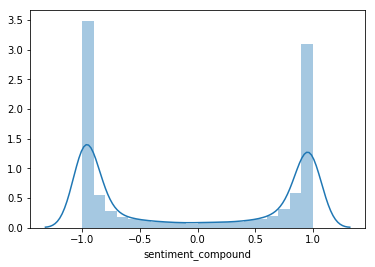

In [26]:
sns.distplot(df['sentiment_compound'])

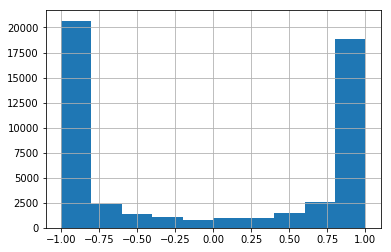

In [27]:
df['sentiment_compound'].hist()

In [35]:
df.sort_values('sentiment_compound')

,content,day,event_code,lat,long,month,place,time,title,url,year,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_compound,sentiment_textblob
50861,At least 14 people have been confirmed dead af...,28.0,73.0,18.9750,72.8258,12.0,IN,"Updated: December 29, 2017 9:30:38 pm",Mumbai Kamala Mills fire LIVE UPDATES: ‘1 Abov...,http://indianexpress.com/article/india/mumbai-...,2017.0,0.069,0.202,0.729,-1.0000,-0.034263
44126,In a sensational the twist to Ryan School murd...,9.0,190.0,31.9167,77.2500,11.0,IN,"Updated: November 10, 2017 1:17:24 pm",Ryan school murder case: Pradyuman Thakur murd...,http://indianexpress.com/article/india/pradyum...,2017.0,0.037,0.258,0.705,-0.9999,-0.007583
27037,A Special Terrorism and Disruptive Activities ...,16.0,2017.0,18.9750,72.8258,6.0,IN,"Updated: June 16, 2017 2:12:35 pm",1993 Mumbai serial blasts verdict highlights: ...,http://indianexpress.com/article/india/1993-mu...,2017.0,0.064,0.232,0.704,-0.9999,-0.090162
35579,With the Supreme Court ordering safeguards aga...,12.0,2017.0,25.4500,81.8500,8.0,IN,"Updated: June 26, 2018 11:21:08 am","498A, battered",http://indianexpress.com/article/india/498a-ba...,2017.0,0.049,0.163,0.789,-0.9999,0.032114
36603,With the Supreme Court admitting the plea chal...,20.0,2017.0,33.7333,75.1500,8.0,IN,"Updated: August 20, 2017 4:55:15 pm",Why justice eludes the victims of Pathribal fa...,http://indianexpress.com/article/india/why-jus...,2017.0,0.051,0.142,0.807,-0.9999,-0.051228
18904,Despite efforts from the government to reduce ...,24.0,2017.0,23.7833,85.9667,4.0,IN,"Updated: April 25, 2017 12:14:24 pm",Naxal attacks: Timeline of major incidents sin...,http://indianexpress.com/article/india/naxal-a...,2017.0,0.033,0.322,0.646,-0.9999,-0.098946
35155,In the increasingly shrill war of words betwee...,10.0,2017.0,12.1000,75.2000,8.0,IN,"Updated: August 11, 2017 8:25:20 am","In Kerala war, how RSS and CPI(M) are two side...",http://indianexpress.com/article/india/in-kera...,2017.0,0.063,0.240,0.697,-0.9999,-0.010617
47801,It is a capital mistake to theorise before one...,5.0,1821.0,25.1833,85.5167,12.0,IN,"Updated: December 6, 2017 7:19:14 am",Why crime data do not always add up to the com...,http://indianexpress.com/article/explained/ncr...,2017.0,0.061,0.216,0.722,-0.9999,0.040436
16446,India and Africa have historically shared a cl...,9.0,2016.0,12.9833,77.5833,4.0,IN,"Updated: April 11, 2017 6:35:50 pm","Attacks on Africans are a modern, violent mani...",http://indianexpress.com/article/opinion/web-e...,2016.0,0.078,0.197,0.724,-0.9999,-0.023164
8548,As Inderjit Singh Reyat walked free on Februar...,19.0,80.0,33.4310,73.2148,2.0,PK,"Published: February 20, 2017 1:16:47 am",In the release of Kanishka bomber Inderjit Sin...,http://indianexpress.com/article/explained/in-...,2017.0,0.054,0.211,0.735,-0.9998,0.052021


In [40]:
df.iloc[45362]['url']

'https://timesofindia.indiatimes.com/india/india-spends-less-on-health-than-any-country-with-middle-income-status/articleshow/61697007.cms'